## Import Required Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
# Reading Dataset
df = pd.read_csv("../data/weatherAUS.csv")

# displays the top 5 columns of the dataframe
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Understanding the Dataset

In [3]:
# no of rows and columns in the dataframe
df.shape

(145460, 23)

In [4]:
# column names of the dataframe
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
# data types of each column in the dataframe
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
# basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != "O"]
print(f"numerical features count in the dataframe : {len(numerical_feature)}")

numerical features count in the dataframe : 16


In [8]:
discrete_feature = [
    feature for feature in numerical_feature if len(df[feature].unique()) < 25
]
print(f"discrete features count in the dataframe : {len(discrete_feature)}")

discrete features count in the dataframe : 2


In [9]:
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature
]
print(f"continuous features count in the dataframe : {len(continuous_feature)}")

continuous features count in the dataframe : 14


In [10]:
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature
]
print(f"categorical features count in the dataframe : {len(categorical_feature)}")

categorical features count in the dataframe : 7


## Data Cleaning

In [11]:
# Check the number of missing values in each column of the dataframe
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [12]:
# Create dummy variables for "RainToday" column and drop the first column to avoid multicollinearity
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first=True)

# Create dummy variables for "RainTomorrow" column and drop the first column to avoid multicollinearity
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first=True)

# Check the number of missing values in each column of the dataframe
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [13]:
# Iterate through each continuous feature in the dataframe
for feature in continuous_feature:
    # Check if the percentage of missing values in the feature is greater than 0
    if (df[feature].isnull().sum() * 100 / len(df)) > 0:
        # If there are missing values, fill them with the median value of the feature
        df[feature] = df[feature].fillna(df[feature].median())

# Check the number of missing values in each column of the dataframe
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         55888
Cloud3pm         59358
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [14]:
# Define a function that fills missing values in a variable with the mode
def mode_nan(df, variable):
    # Get the mode of the variable
    mode = df[variable].value_counts().index[0]
    # Fill the missing values in the variable with the mode
    df[variable].fillna(mode, inplace=True)


# Fill missing values in the "Cloud9am" and "Cloud3pm" variables with their respective modes
mode_nan(df, "Cloud9am")
mode_nan(df, "Cloud3pm")

# Check the number of missing values in each column of the dataframe
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [15]:
# Define a function that performs random sample imputation on a given variable in a dataframe
def randomsampleimputation(df, variable):
    # Get the number of missing values in the variable
    null_count = df[variable].isnull().sum()
    # If there are any missing values
    if null_count > 0:
        # Sample random values from the non-missing values to fill the missing values
        random_sample = df[variable].dropna().sample(null_count, random_state=0)
        # Assign the random sample values to the missing values in the dataframe
        df.loc[df[variable].isnull(), variable] = random_sample


# Apply random sample imputation to selected variables in the dataframe
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

# Check the number of missing values in each column of the dataframe
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [16]:
# Create mapping values
windgustdir = {
    "NNW": 0,
    "NW": 1,
    "WNW": 2,
    "N": 3,
    "W": 4,
    "WSW": 5,
    "NNE": 6,
    "S": 7,
    "SSW": 8,
    "SW": 9,
    "SSE": 10,
    "NE": 11,
    "SE": 12,
    "ESE": 13,
    "ENE": 14,
    "E": 15,
}
winddir9am = {
    "NNW": 0,
    "N": 1,
    "NW": 2,
    "NNE": 3,
    "WNW": 4,
    "W": 5,
    "WSW": 6,
    "SW": 7,
    "SSW": 8,
    "NE": 9,
    "S": 10,
    "SSE": 11,
    "ENE": 12,
    "SE": 13,
    "ESE": 14,
    "E": 15,
}
winddir3pm = {
    "NW": 0,
    "NNW": 1,
    "N": 2,
    "WNW": 3,
    "W": 4,
    "NNE": 5,
    "WSW": 6,
    "SSW": 7,
    "S": 8,
    "SW": 9,
    "SE": 10,
    "NE": 11,
    "SSE": 12,
    "ENE": 13,
    "E": 14,
    "ESE": 15,
}

# Mapping wind directions to numerical values for WindGustDir, WindDir9am, and WindDir3pm columns
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

# Filling the null values with the most frequent value in each of the three columns
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

# Check the number of missing values in each column of the dataframe
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [17]:
# create a dictionary that maps each location to a numerical value
location = {
    "Portland": 1,
    "Cairns": 2,
    "Walpole": 3,
    "Dartmoor": 4,
    "MountGambier": 5,
    "NorfolkIsland": 6,
    "Albany": 7,
    "Witchcliffe": 8,
    "CoffsHarbour": 9,
    "Sydney": 10,
    "Darwin": 11,
    "MountGinini": 12,
    "NorahHead": 13,
    "Ballarat": 14,
    "GoldCoast": 15,
    "SydneyAirport": 16,
    "Hobart": 17,
    "Watsonia": 18,
    "Newcastle": 19,
    "Wollongong": 20,
    "Brisbane": 21,
    "Williamtown": 22,
    "Launceston": 23,
    "Adelaide": 24,
    "MelbourneAirport": 25,
    "Perth": 26,
    "Sale": 27,
    "Melbourne": 28,
    "Canberra": 29,
    "Albury": 30,
    "Penrith": 31,
    "Nuriootpa": 32,
    "BadgerysCreek": 33,
    "Tuggeranong": 34,
    "PerthAirport": 35,
    "Bendigo": 36,
    "Richmond": 37,
    "WaggaWagga": 38,
    "Townsville": 39,
    "PearceRAAF": 40,
    "SalmonGums": 41,
    "Moree": 42,
    "Cobar": 43,
    "Mildura": 44,
    "Katherine": 45,
    "AliceSprings": 46,
    "Nhil": 47,
    "Woomera": 48,
    "Uluru": 49,
}

# map the location column in the dataframe to the numerical values in the location dictionary
df["Location"] = df["Location"].map(location)

# Select the "Location", "RainToday", and "RainTomorrow" columns from the dataframe then display the first 5 rows
df[["Location", "RainToday", "RainTomorrow"]].head()

,Location,RainToday,RainTomorrow
0,30,0,0
1,30,0,0
2,30,0,0
3,30,0,0
4,30,0,0


In [18]:
# Convert the "Date" column to a datetime format, using the given format string, and ignore any errors
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%dT", errors="coerce")

# Create a new column "Date_month" in the dataframe that contains the month of each date in the "Date" column
df["Date_month"] = df["Date"].dt.month

# Create a new column "Date_day" in the dataframe that contains the day of each date in the "Date" column
df["Date_day"] = df["Date"].dt.day

# Select the "Date", "Date_month", and "Date_day" columns from the dataframe then display the first 5 rows
df[["Date", "Date_month", "Date_day"]].head()

,Date,Date_month,Date_day
0,2008-12-01,12,1
1,2008-12-02,12,2
2,2008-12-03,12,3
3,2008-12-04,12,4
4,2008-12-05,12,5


In [19]:
def remove_outliers(df, col_name):
    # Calculate the interquartile range (IQR)
    IQR = df[col_name].quantile(0.75) - df[col_name].quantile(0.25)

    # Calculate the lower and upper bridges
    lower_bridge = df[col_name].quantile(0.25) - (IQR * 1.5)
    upper_bridge = df[col_name].quantile(0.75) + (IQR * 1.5)

    # Replace outlier values with the bridge values
    df.loc[df[col_name] >= upper_bridge, col_name] = upper_bridge
    df.loc[df[col_name] <= lower_bridge, col_name] = lower_bridge

    # Return the modified dataframe
    return df


# List of column names to remove outliers from
columns_to_remove_outliers = [
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "Evaporation",
    "Sunshine",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Temp9am",
    "Temp3pm",
]

# Iterate over each column name and apply the remove_outliers function
for col_name in columns_to_remove_outliers:
    df = remove_outliers(df, col_name)

In [20]:
# gives a brief summary stats of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,24.289784,13.759051,1.00,12.0,24.0,36.0,49.00
MinTemp,145460.0,12.192336,6.364499,-5.95,7.7,12.0,16.8,30.45
MaxTemp,145460.0,23.219758,7.067804,2.70,18.0,22.6,28.2,43.50
Rainfall,145460.0,0.381674,0.608638,0.00,0.0,0.0,0.6,1.50
Evaporation,145460.0,4.750932,1.454089,2.20,4.0,4.8,5.2,7.00
Sunshine,145460.0,8.422820,0.676532,7.45,8.2,8.4,8.7,9.45
WindGustDir,145460.0,7.311804,4.472865,0.00,4.0,7.0,11.0,15.00
WindGustSpeed,145460.0,39.643280,12.175910,8.50,31.0,39.0,46.0,68.50
WindDir9am,145460.0,6.964423,4.837706,0.00,2.0,7.0,11.0,15.00
WindDir3pm,145460.0,7.604297,4.492407,0.00,4.0,8.0,11.0,15.00


## Data Visualization

In [21]:
from scipy import stats
from statsmodels.api import qqplot

In [22]:
def plot_categorical(col_name):
    fig, ax = plt.subplots(
        nrows=1, ncols=2, figsize=(14, 5)
    )  # sets 1 x 2 subplots with figure size of (14,5)
    df[col_name].value_counts().plot.pie(
        autopct="%.0f%%", shadow=True, startangle=180, ax=ax[0]
    )  # plots pie chart of column with % percentage
    df[col_name].value_counts().plot.barh(
        ax=ax[1]
    )  # plots bar chart of column value counts
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

In [23]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and boxplot)
def plot_distribution(col_name):
    fig, axes = plt.subplots(
        2, 2, figsize=(15, 10)
    )  # sets 2 x 2 subplots with figure size of (14,10)
    sns.histplot(
        x=col_name, data=df, ax=axes[0][0], bins=20
    )  # displays histogram of the given dataframe column
    qqplot(
        data=df[col_name], ax=axes[0][1], line="45", fit=True, dist=stats.norm
    )  # displays quantile-quantile plot of the given dataframe column
    sns.kdeplot(
        x=col_name, data=df, ax=axes[1][0], fill=True
    )  # displays kernel density estimate plot of the given dataframe column
    sns.boxplot(
        x=col_name, data=df, ax=axes[1][1]
    )  # displays boxplot of the given dataframe column
    plt.suptitle(
        "Distribution of " + col_name
    )  # sets the title for the subplot as "Distribution of <column name>"
    plt.show()  # shows the plot

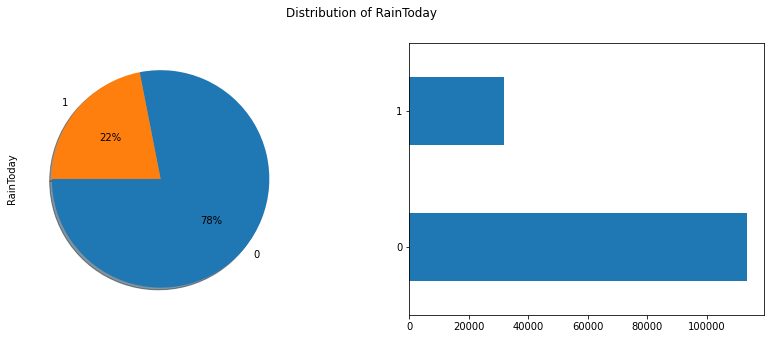

In [24]:
plot_categorical("RainToday")

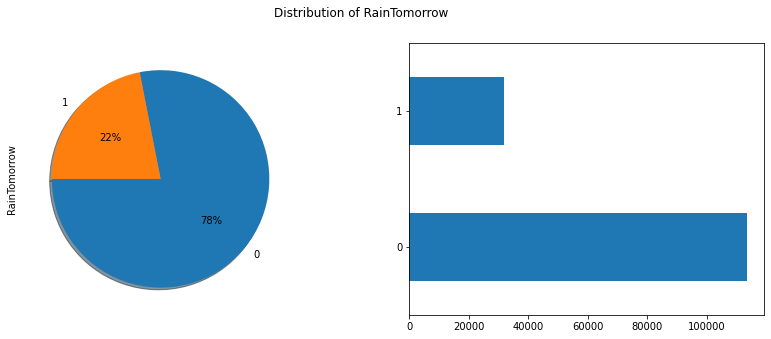

In [25]:
plot_categorical("RainTomorrow")

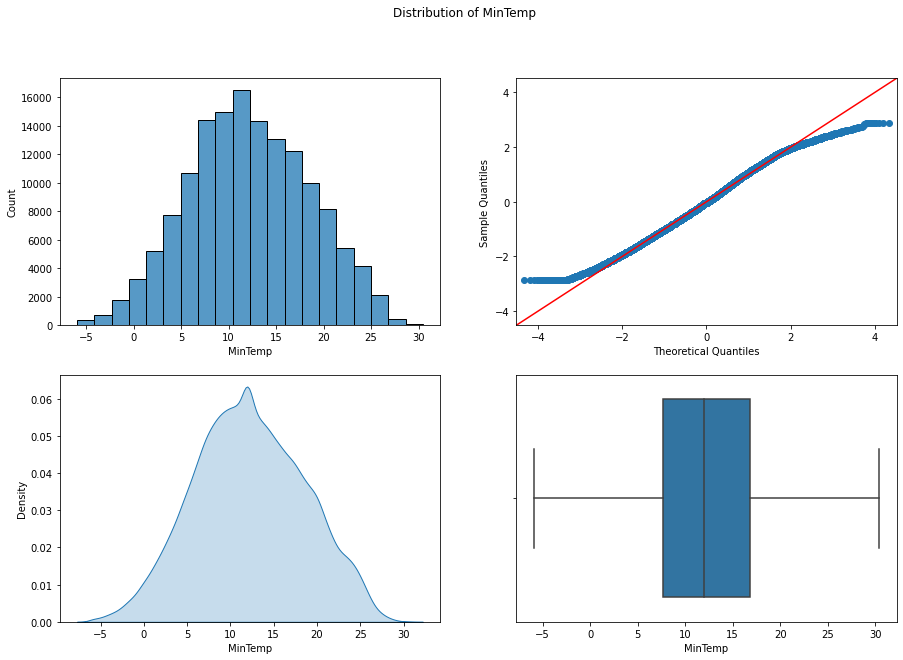

In [26]:
plot_distribution(continuous_feature[0])

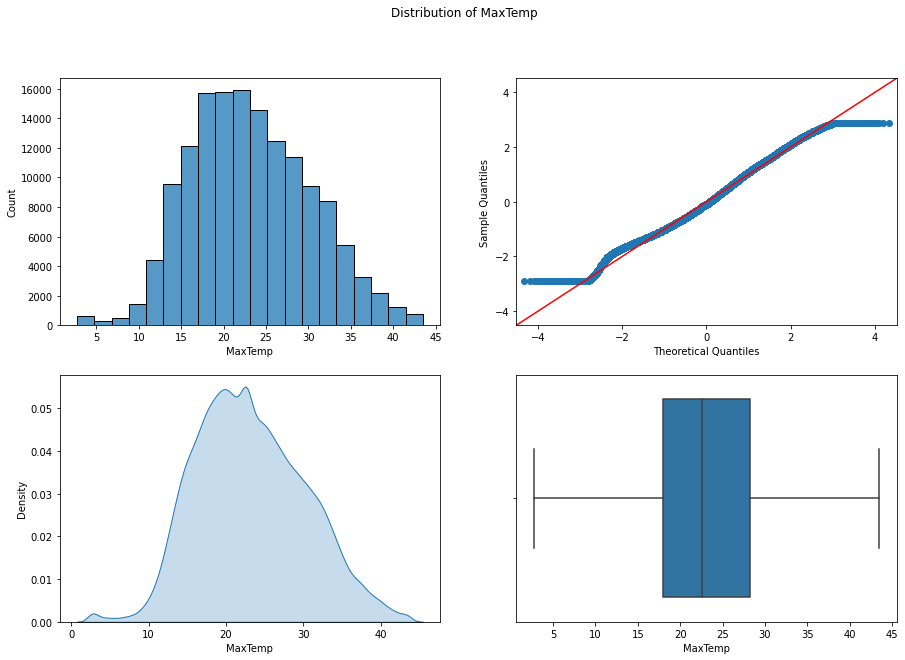

In [27]:
plot_distribution(continuous_feature[1])

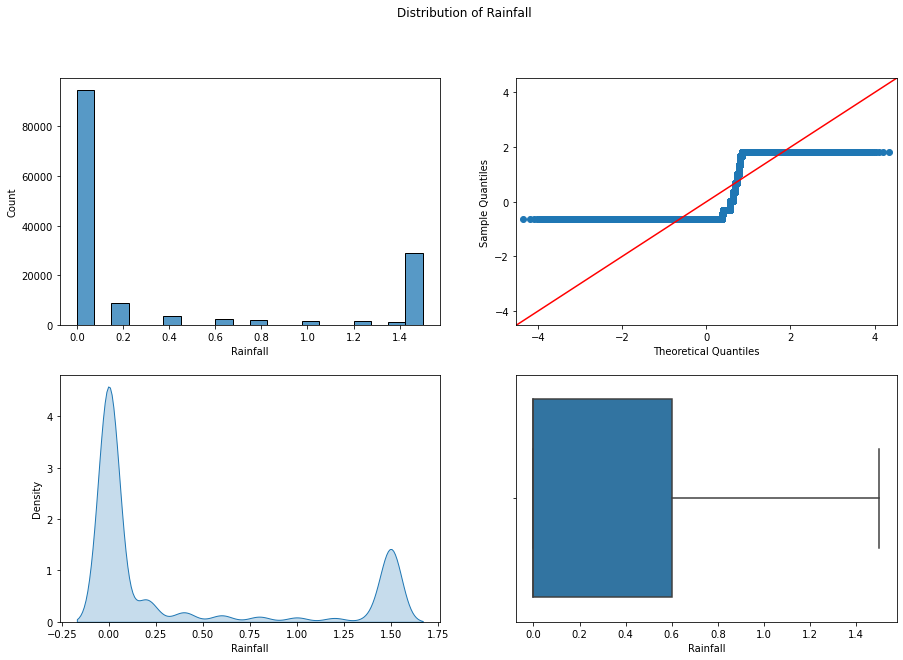

In [28]:
plot_distribution(continuous_feature[2])

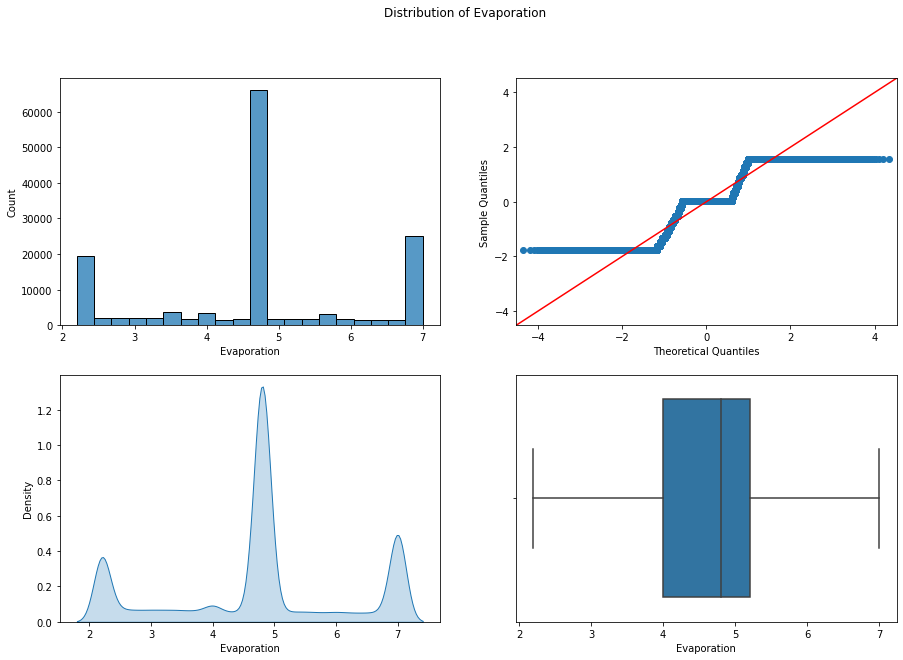

In [29]:
plot_distribution(continuous_feature[3])

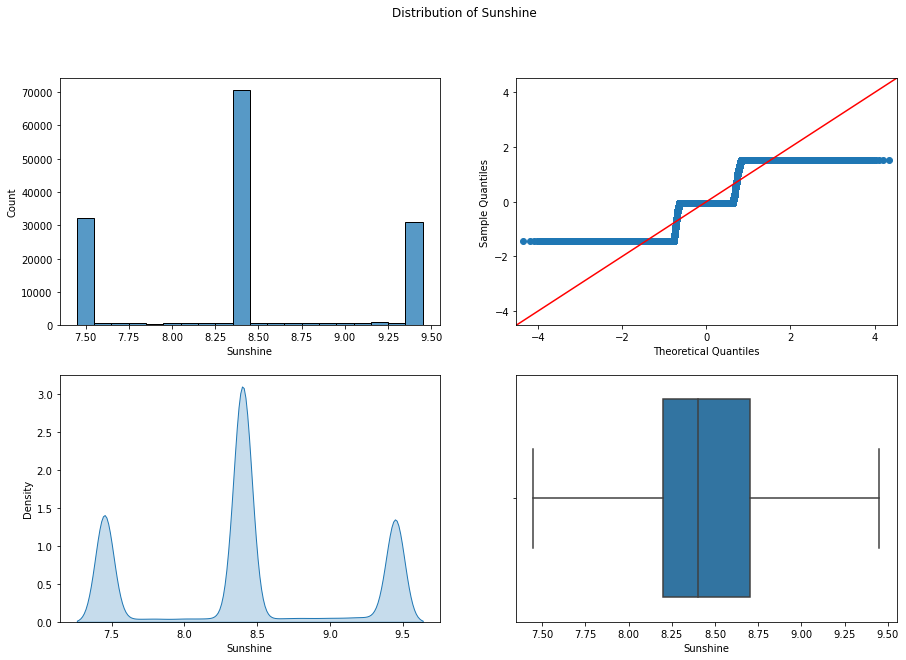

In [30]:
plot_distribution(continuous_feature[4])

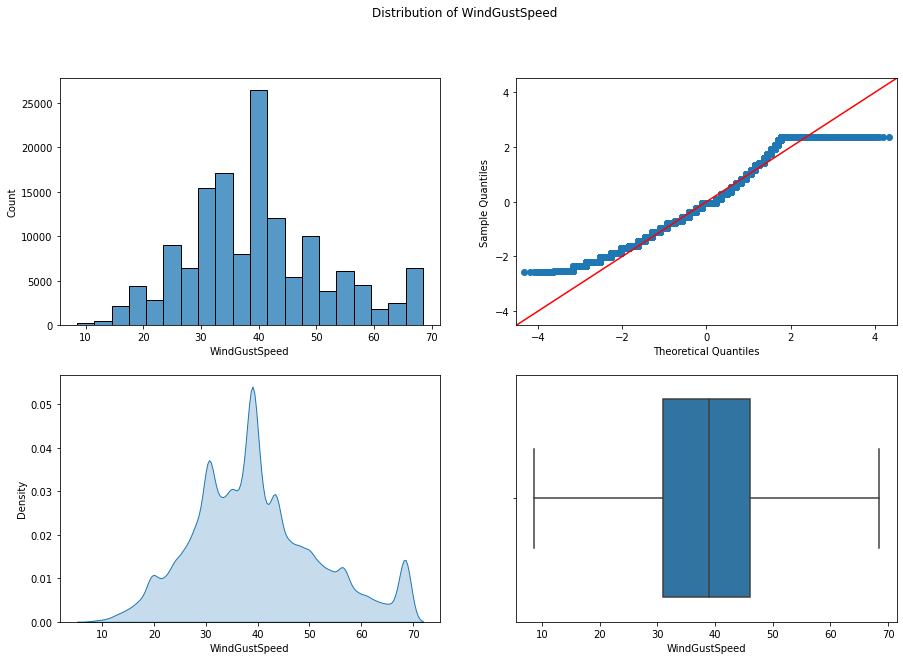

In [31]:
plot_distribution(continuous_feature[5])

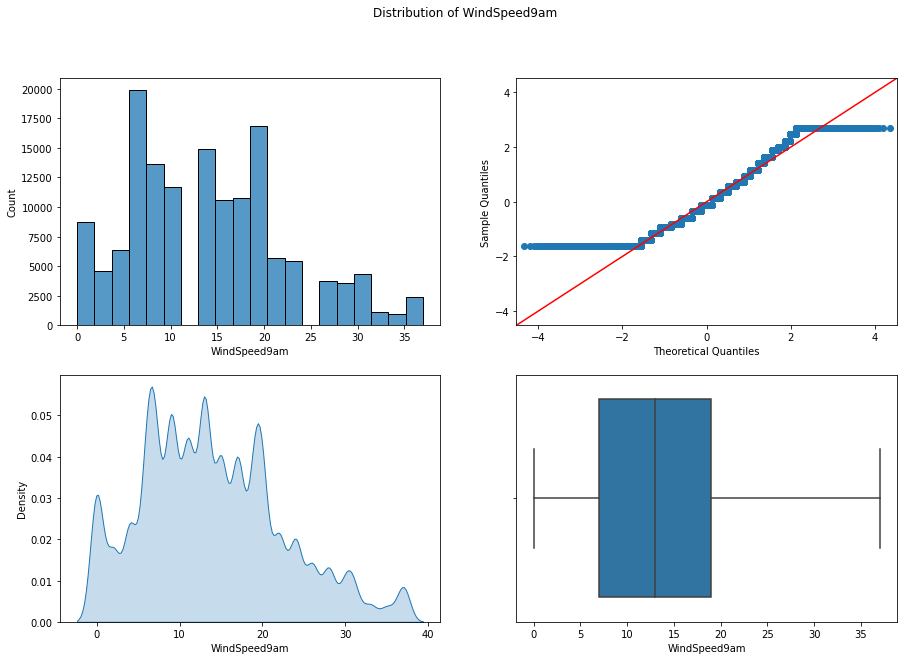

In [32]:
plot_distribution(continuous_feature[6])

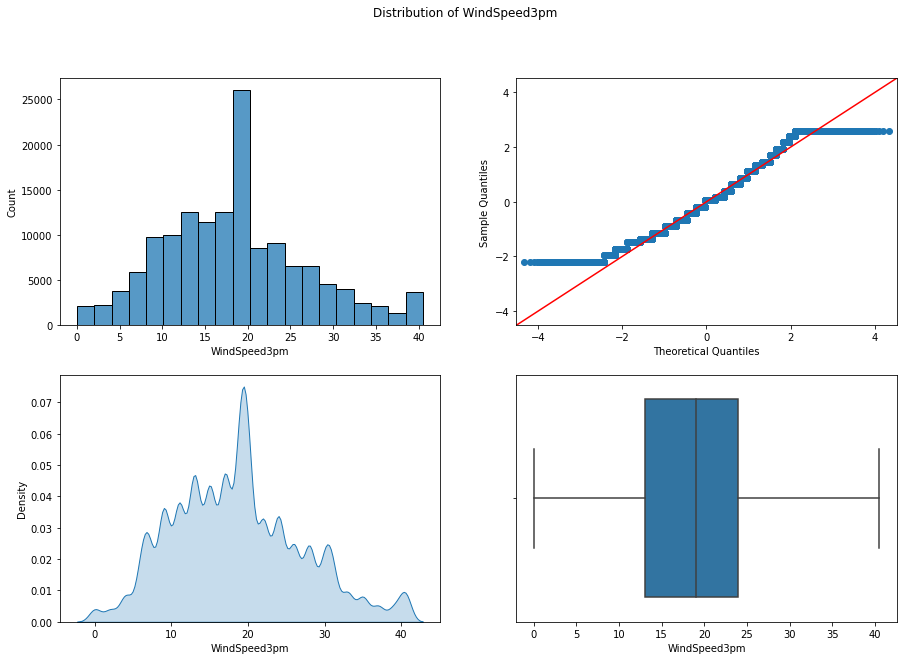

In [33]:
plot_distribution(continuous_feature[7])

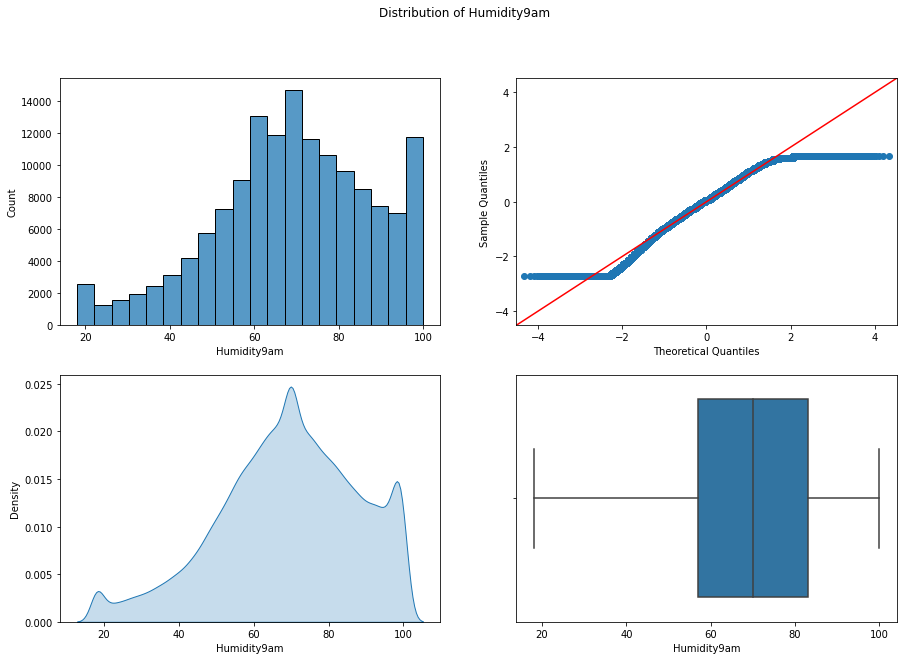

In [34]:
plot_distribution(continuous_feature[8])

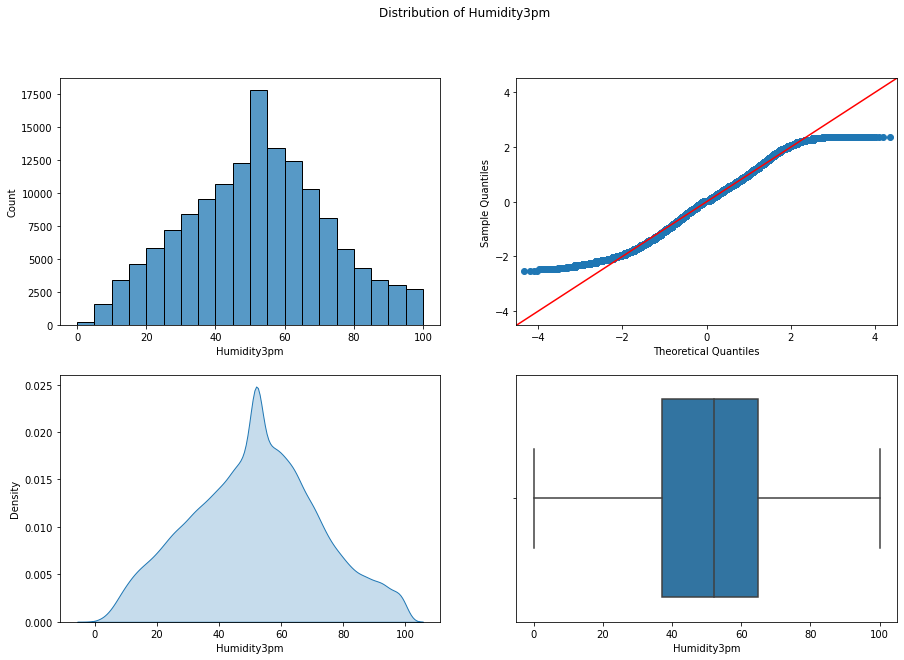

In [35]:
plot_distribution(continuous_feature[9])

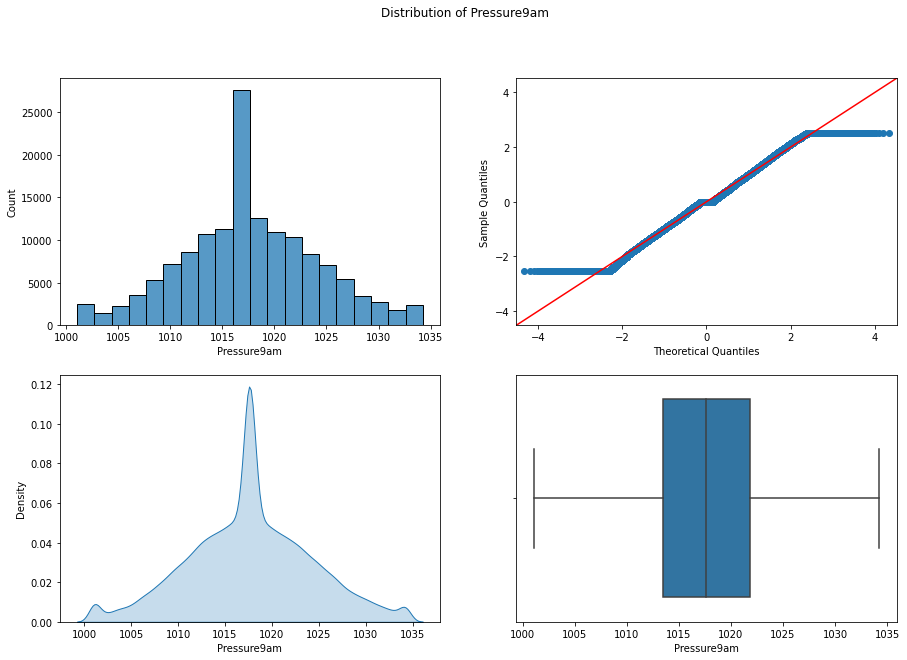

In [36]:
plot_distribution(continuous_feature[10])

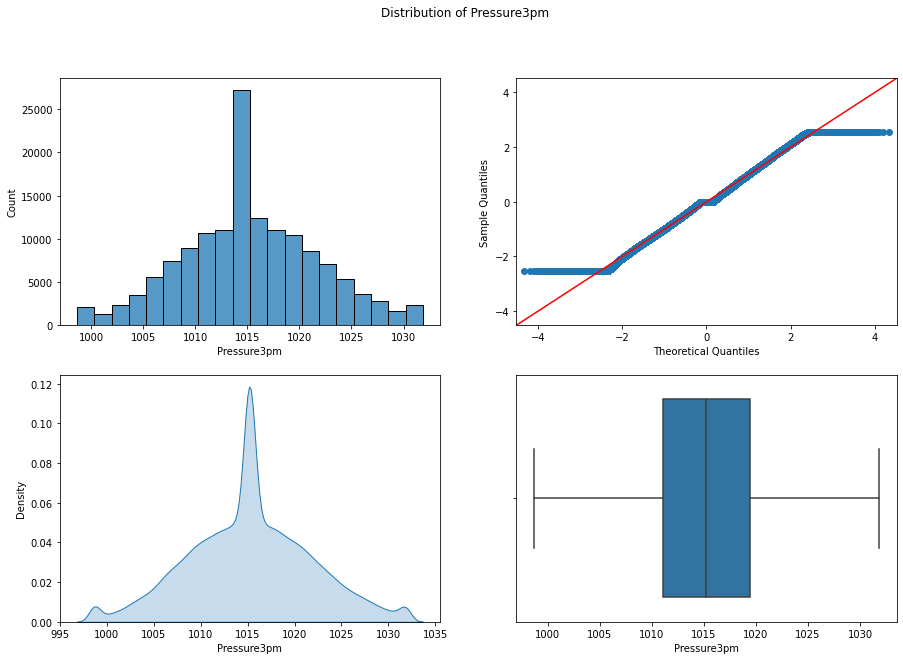

In [37]:
plot_distribution(continuous_feature[11])

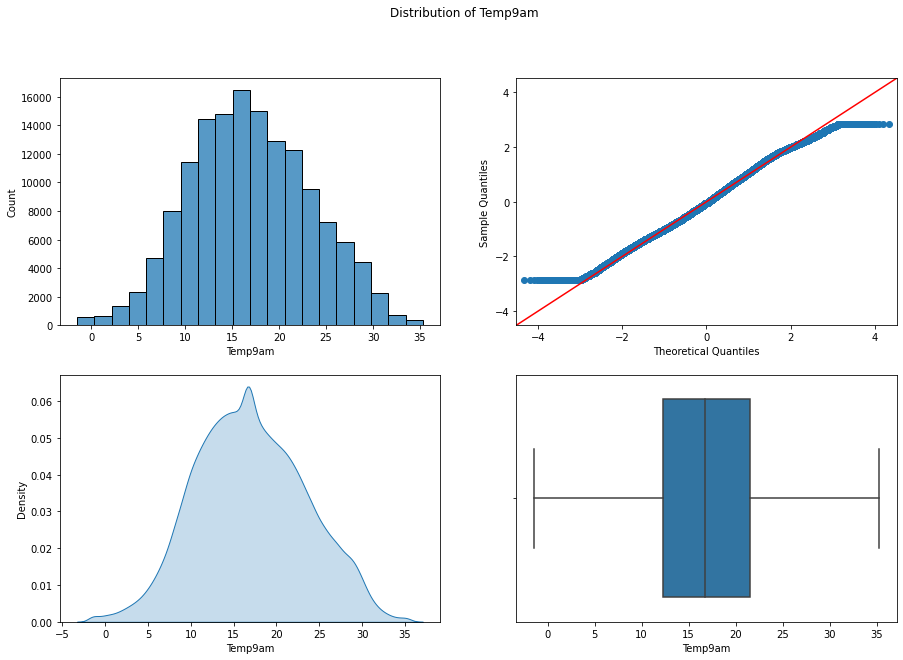

In [38]:
plot_distribution(continuous_feature[12])

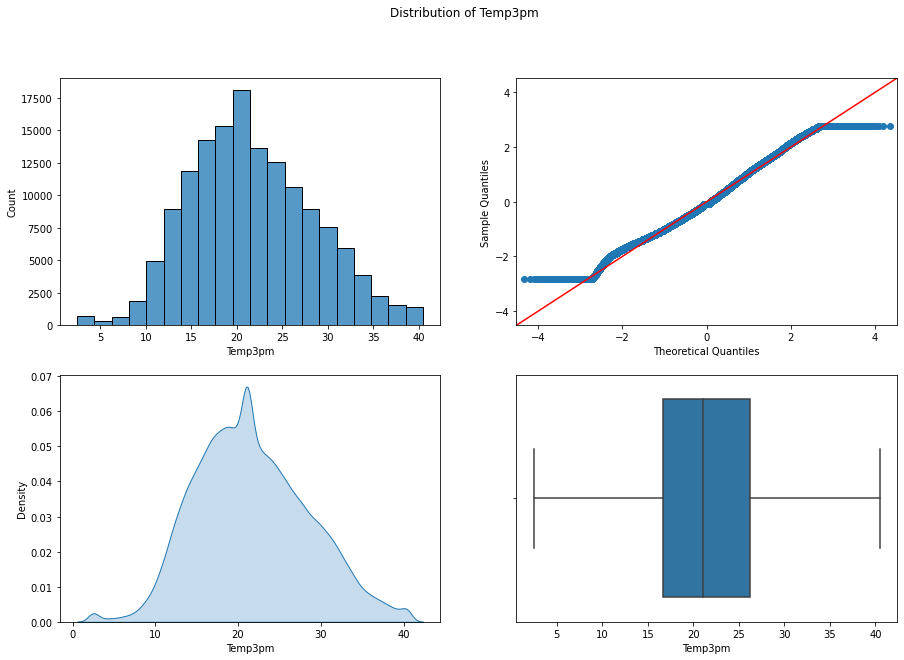

In [39]:
plot_distribution(continuous_feature[13])

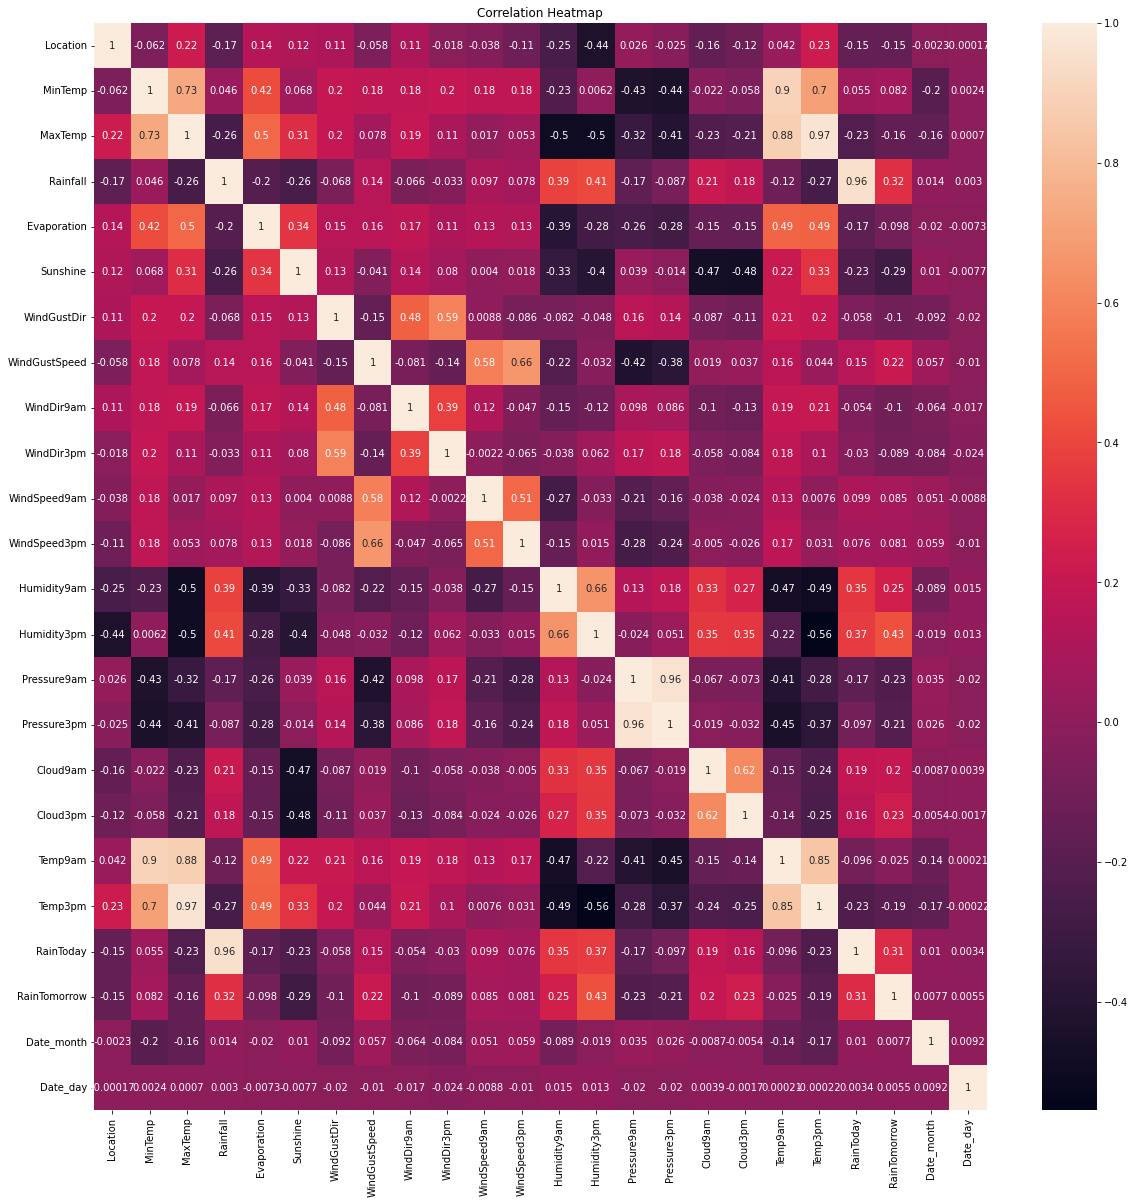

In [40]:
# Set the figure size of the plot to be 20 inches by 20 inches
plt.figure(figsize=(20, 20))

# Set the figure title
plt.title("Correlation Heatmap")

# Create a heatmap of the correlation matrix using seaborn's heatmap function, and display the correlation values
# in each cell of the heatmap using the "annot" parameter
g = sns.heatmap(df.corr(), annot=True)